<a href="https://colab.research.google.com/github/SebastianLealT/OPTIMIZACION-1/blob/main/Optimizaci%C3%B3n_en_varias_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Métodos de optimización: Funciones de varias variables*
##Johan Sebastian Leal Toro
##Curso de Optimización I
##Universidad del Valle, Cali

En este cuaderno nos centraremos en estudiar los siguientes métodos para el cálculo de mínimos de funciones multivariables:
1. Método de Nelder-Mead
2. Método del Gradiente (máximo descenso)
3. 
4. Método de

Para ello Importamos los siguientes paquetes:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

##Función a evaluar y algunos cálculos manuales

Definimos la función multivariable con la que se quiere trabajar, en este caso será:

$$f(x,y)=(x+2y-7)^{2}+(2x+y-5)^{2}$$

la cual es conocida como *Booth Function*.

Seguidamente delimitamos el dominio de la función en donde se llevará a cabo el proceso de minimización:

In [7]:
#Se establecen las cotas para los ejes x e y respectivamente
x_min, x_max = -10, 10
y_min, y_max = -10, 10

Habiendo restringido el dominio, es necesario crear una lista de puntos (particiones) para cada eje, de esta manera será posible crear la malla donde se mostrará nuestra gráfica.

In [8]:
#Partición para el eje x con 100 puntos
xx = np.linspace(x_min,x_max,100)
#Partición para el eje y con 100 puntos
yy = np.linspace(y_min,y_max,100)

#Creamos la malla de pares (x,y) que me cubre todos los puntos sobre el dominio definido
X, Y = np.meshgrid(xx, yy)

Se deifine ahora la función Booth tomando a $x$ como una lista de dos elementos, el primero corresponde a la componente en el eje $x$ y el segundo corresponde a la componente en el eje $y$.

In [9]:
def booth(x):
  return ((x[0] + (2*x[1]) -7)**2) + (((2*x[0]) + x[1] - 5)**2)

Graficamos las curvas de nivel de nuestra función, evaluandola en cada punto de la malla.

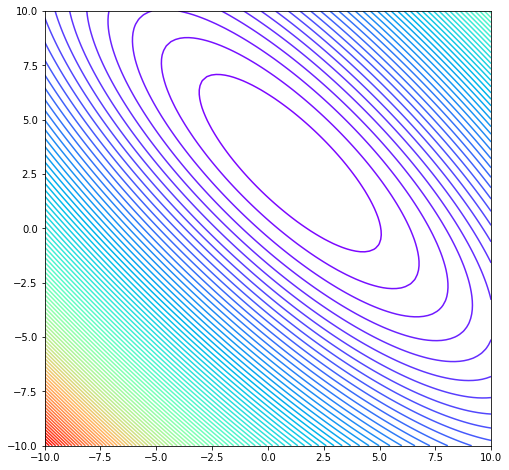

In [10]:
#Se crea la lista de puntos resultantes al evaluar la función
Z = booth([X, Y])

#Creamos la imagen y mostramos la gráfica
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
plt.show()

Para algunos métodos aplicados en este cuaderno será necesario conocer el gradiente y la Hessiana de la función en cuestión, para ello realizamos algunos cálculos manuales y definimos cada una de estas operaciones. Iniciaremos por definir el gradiente de la función Booth como:
$$\nabla f(x,y)=\langle \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \rangle$$
$$\nabla f(x,y) = \langle 2(x+2y-7)+4(2x+y-5), 4(x+2y-7)+2(2x+y-5)\rangle$$

In [20]:
#Se define el gradiente
def Df(x):
  return np.array([(2*(x[0] + (2*x[1]) -7)) + (4*((2*x[0]) + x[1] - 5)) , (4*(x[0] + (2*x[1]) -7)) + (2*((2*x[0]) + x[1] - 5))])

##Método de Nelder-Mead

Este método toma $n+1$ puntos en $n$ dimensiones y busca de manera aproximada una solución óptima local al problema cuando la función a minimizar varía suavemente. A estos $n+1$ puntos se les conoce como un *Simplex* que va cambiando con cada iteración del método aplicado, pues en cada paso este se encarga de cambiar el punto mas lejano al mínimo por uno que se encuentre mas cerca de este.

Dado que la gráfica de la función a evaluar vive en $\mathbb{R}^{2}$, el simplex a tomar en cada paso debe tener 3 puntos. Nos vemos entonces interesados en conocer el simplex en la última iteración realizada por el programa, también la evaluación de la función en estos 3 puntos. Definimos entonces una función que nos guarde los datos para cada iteración, a esta la llamaremos *store*. Definimos también el punto donde se quiere iniciar el programa.

In [15]:
#Punto inicial para la evaluación
x0=[-7,-5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX = [x0[0]]
liY = [x0[1]]
liF = [booth(x0)]

#Función store
def store(X):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(booth(X))

Aplicamos ahora el comando *Optimize* para el método de Nelder-Mead, el cual nos dará los resultados en este orden:
1. Simplex final y evaluación de la función en esos puntos.
2. (fun) Evaluación de la función en el punto encontrado.
3. (message) Indica si la optimización se realizó exitosamente.
4. (nfev) Número de evaluaciones en la función realizadas por el método
5. (nit) Cantidad de iteraciones
6. Indica si el método terminó o no.
7. (success) Indica si el proceso llegó o no al mínimo de la función.
8. (x) Es el último punto donde se evaluó la función, el mínimo.

In [17]:
optimize.minimize(booth, x0, method="Nelder-Mead", callback=store, options={"xtol": 1e-10})

 final_simplex: (array([[1., 3.],
       [1., 3.],
       [1., 3.]]), array([2.49450713e-21, 6.35507709e-21, 1.47720856e-20]))
           fun: 2.4945071295124068e-21
       message: 'Optimization terminated successfully.'
          nfev: 200
           nit: 103
        status: 0
       success: True
             x: array([1., 3.])

Gráficamente el cambio de cada punto en el simplex por uno mas óptimo en cada iteración se puede ver en la siguiente gráfica:

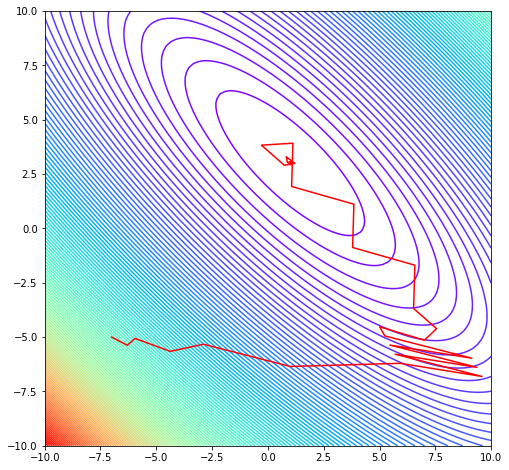

In [18]:
#Graficamos nuevamente las curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")
#Se raliza la gráfica de los puntos guardados por la función store para  x e y
plt.plot(liX,liY, color='red')

plt.show()

###Error

Dado que el valor teórico del mínimo de esta función es $f(0, -1)=3$ podemos calcular el error para cada evaluación de la función en cada iteración.

In [54]:
#Error en cada iteración
ErrorNM = abs(np.array(liF)-3)/abs(3)
ErrorNM

array([1.15230250e+05, 6.96761837e+04, 4.12536852e+04, 3.88639435e+03,
       3.88639435e+03, 3.88639435e+03, 3.88639435e+03, 3.88639435e+03,
       3.88639435e+03, 3.88639435e+03, 3.88639435e+03, 3.47291250e+03,
       3.39732408e+03, 2.62269157e+03, 2.62269157e+03, 1.92477974e+03,
       1.09970604e+03, 1.41915269e+02, 3.61394055e+01, 2.47779209e+01,
       2.47779209e+01, 2.47779209e+01, 7.15777583e+00, 7.15777583e+00,
       7.15777583e+00, 6.52966498e+00, 5.15592949e+00, 4.94119481e+00,
       4.67507582e+00, 4.35301967e+00, 4.35301967e+00, 4.24879726e+00,
       3.94259974e+00, 3.51900802e+00, 2.82989894e+00, 1.66480283e+00,
       5.47175481e-01, 2.71084916e-02, 2.71084916e-02, 2.71084916e-02,
       2.71084916e-02, 1.32554700e-02, 6.17154156e-03, 1.85041617e-03,
       1.85041617e-03, 1.85041617e-03, 1.28496519e-04, 1.28496519e-04,
       1.28496519e-04, 1.28496519e-04, 8.24061896e-05, 1.18914260e-05,
       1.18914260e-05, 1.18914260e-05, 2.58653712e-06, 1.26684401e-06,
      

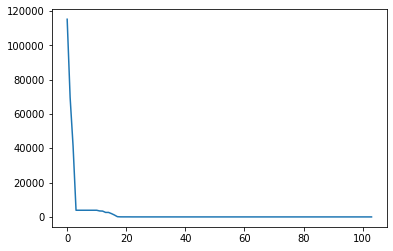

In [55]:
#Gráfica del error
plt.plot(ErrorNM)

##Método del Gradiente (máximo descenso)

Este método aplica reducciones sucesivas de un punto sobre la función dada en dirección opuesta del gradiente, pues este se sabe que siempre apunta hacia el máximo valor (local) de la función. La transición de un punto $x_{k}$ a un punto $x_{k+1}$ viene dada por la siguiente expresión:
$$x_{k+1}=x_{k}-\alpha_{k}\nabla f(x_{k})$$
donde $\alpha_{k}$ es la longitud de paso desde el punto $x_{k}$ al punto $x_{k+1}$ y $\nabla f(x_{k})$ es la dirección de búsqueda del máximo descenso.

Definimos entonces la función que nos guardará las listas de puntos en cada iteración y aplicará en general este método de optimización:

In [21]:
#Se definen las listas vacías para los puntos de x, y y las evaluaciones de la función
lisX=[]
lisY=[]
lisF=[]

#Definimos la función del máximo descenso con un punto inicial x0, la función a trabajar y su gradiente Df
def gradient_descent(x0, booth, Df):
  x_i, y_i = x0
  for i in range(1,100):
    lisX.append(x_i)
    lisY.append(y_i)
    lisF.append(booth([x_i,y_i]))
    dx_i, dy_i= Df([x_i,y_i])
    alpha = optimize.line_search(booth, Df, np.array([x_i,y_i]), -np.array([dx_i, dy_i])) [0] ## [0] por que lo primero que regresa es el alpha, no necesitamos lo demas
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    x_i += - alpha*dx_i  # x_i = x_i - alpha * dx_i
    y_i += - alpha*dy_i
    if np.abs(lisF[-1]) < 1e-16:
      break

##Método 3

##Método 4

##Comparación de Errores

##Conclusiones

1. 
2. 
3. 

##Referencias

1. Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.
2. Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.